In [0]:
import numpy as np
import pandas as pd

In [0]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2019-01-10 10:39:34--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.10MB/s    in 0.2s    

2019-01-10 10:39:34 (4.10 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [0]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [0]:
!ls

ml-latest-small  ml-latest-small.zip  sample_data


In [0]:
ratings_data = pd.read_csv('ml-latest-small/ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
movie_names = pd.read_csv("ml-latest-small/movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [0]:
print("No. of unique movies: ", movie_data['title'].nunique())
print("No. of unique users: ", movie_data['userId'].nunique())

No. of unique movies:  9719
No. of unique users:  610


In [0]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [0]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [0]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [0]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['ratings_count'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.sort_values('ratings_count', ascending=False).head()

,rating,ratings_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [0]:
plot_data = ratings_mean_count.sort_values(by=['ratings_count'])
plot_data.head()

,rating,ratings_count
title,,
'71 (2014),4.0,1
Latter Days (2003),3.5,1
"Late Shift, The (1996)",2.5,1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),2.0,1
Late Night Shopping (2001),4.5,1


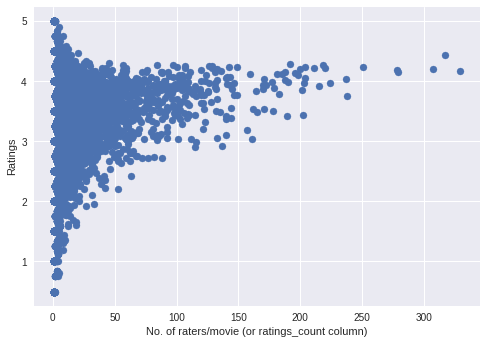

In [0]:
import matplotlib.pyplot as plt
plt.scatter(plot_data['ratings_count'], plot_data['rating'])
plt.xlabel('No. of raters/movie (or ratings_count column)')
plt.ylabel('Ratings')
plt.show()

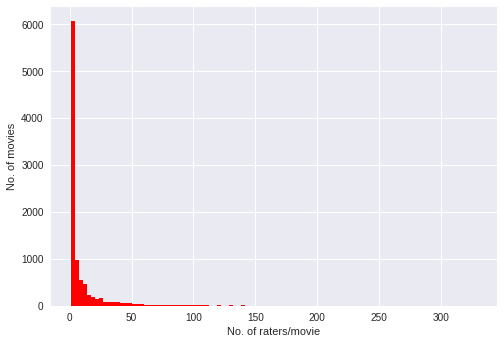

In [0]:
plt.hist(plot_data['ratings_count'], 100, facecolor='r')
plt.xlabel('No. of raters/movie')
plt.ylabel('No. of movies')
plt.grid(True)
plt.show()

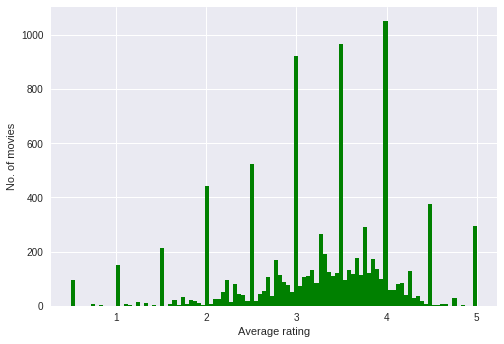

In [0]:
plt.hist(plot_data['rating'], 100, facecolor='g')
plt.xlabel('Average rating')
plt.ylabel('No. of movies')
plt.grid(True)
plt.show()

Integers/(0.5s) have spikes as there are users who give ratings just as integers.

Joining all the 3 plots.

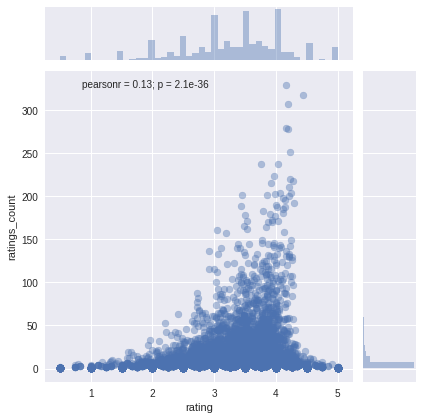

In [0]:
import seaborn as sns
sns.jointplot(x='rating', y='ratings_count', data=ratings_mean_count, alpha=0.4)

Correlational Filtering

In [0]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Why all the cells are 'NaN'? Hint: Remove the '.head()' and check

In [0]:
shawshank_ratings = user_movie_rating['Shawshank Redemption, The (1994)']
shawshank_ratings.head()

userId
1    NaN
2    3.0
3    NaN
4    NaN
5    3.0
Name: Shawshank Redemption, The (1994), dtype: float64

In [0]:
movies_like_shawshank = user_movie_rating.corrwith(shawshank_ratings)

corr_shawshank = pd.DataFrame(movies_like_shawshank, columns=['Correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
title,
"'burbs, The (1989)",0.419543
(500) Days of Summer (2009),0.249580
*batteries not included (1987),0.404520
...And Justice for All (1979),-1.000000
10 Cloverfield Lane (2016),0.145671


In [0]:
corr_shawshank.sort_values(by='Correlation', ascending=False).head()

,Correlation
title,
"Principal, The (1987)",1.0
Chi-Raq (2015),1.0
Rififi (Du rififi chez les hommes) (1955),1.0
Robot & Frank (2012),1.0
Rock Star (2001),1.0


In [0]:
corr_shawshank = corr_shawshank.join(ratings_mean_count['ratings_count'])
corr_shawshank.head()

,Correlation,ratings_count
title,,
"'burbs, The (1989)",0.419543,17
(500) Days of Summer (2009),0.249580,42
*batteries not included (1987),0.404520,7
...And Justice for All (1979),-1.000000,3
10 Cloverfield Lane (2016),0.145671,14


In [0]:
corr_shawshank[corr_shawshank['ratings_count']>50].sort_values('Correlation', ascending=False).head()

,Correlation,ratings_count
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Rear Window (1954),0.545149,84
My Cousin Vinny (1992),0.523016,59
Bad Boys (1995),0.516762,51
City of God (Cidade de Deus) (2002),0.486670,75
